In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Transfer learning

Cuando hablamos de transfer learning nos referimos al proceso de entrenamiento de un modelo en un problema relacionado con otro modelo. La manera en que funciona es cuando tomamos los pesos ya entrenados de una arquitectura de red neuronal que fue entrenada con una gran cantidad de imagenes. 

Estos pesos reusados pueden ayudarnos a resolver el problema, o pueden ser un punto de partida para entrenar nuestro propio modelo y adaptarlo a un nuevo problema.

Por lo general nos encontramos con librerias que ya tienen incluidas aplicaciones con estas arquitecturas, en donde se entrenaron los pesos con la base de datos IMAGENET.

## VGG16



In [1]:
#vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

El siguiente ejemplo fue sacado de un curso tomado para redes neuronales. 


Como primer paso se importa la libreria `glob` la cual nos ayudara a importar las imagenes por categoria, y modificarlas para poder usar el transfer learning.

Como regla inicial para todas las arquitecturas, el tamano de las imagenes debe de ser 224x224.

En el dataset sólo tenemos dos clases las cuales se definen acontiuacion.

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
# For training set only
import glob
organic = glob.glob('C:/Git/MCD-PCD/Tarea 06/datos/DATASET/DATASET/TRAIN/O/*.*')
recycle = glob.glob('C:/Git/MCD-PCD/Tarea 06/datos/DATASET/DATASET/TRAIN/C/*.*')
# angry = glob.glob('/content/drive/My_Drive/train_logmel/angry/*.*')
# calm = glob.glob('/content/drive/My_Drive/train_logmel/calm/*.*')
# disgust = glob.glob('/content/drive/My_Drive/train_logmel/disgust/*.*')
# fearful = glob.glob('/content/drive/My_Drive/train_logmel/fearful/*.*')
# happy = glob.glob('/content/drive/My_Drive/train_logmel/happy/*.*')
# neutral = glob.glob('/content/drive/My_Drive/train_logmel/neutral/*.*')
# sad = glob.glob('/content/drive/My_Drive/train_logmel/sad/*.*')
# surprised = glob.glob('/content/drive/My_Drive/train_logmel/surprised/*.*')
data = []
labels = []
for i in organic:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('organic')
for i in recycle:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('recycle')
# for i in angry:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Angry')
# for i in calm:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Calm')
# for i in disgust:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Disgust')
# for i in fearful:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Fearful')
# for i in happy:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Happy')
# for i in neutral:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Neutral')
# for i in sad:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Sad')
# for i in surprised:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append('Surprised')
train_data = np.array(data)
train_labels = np.array(labels)

Normalizamos los datos y hacemos una transformacion a las etiquetas que pusimos anteriormente.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

(X_train, X_test, y_train, y_test) = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

In [7]:
from keras.utils import np_utils
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# le = preprocessing.LabelEncoder()
# le.fit(["organic", "recycle"])
lb = preprocessing.LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

Importamos desde la aplicacion de Keras los pesos que vamos a utilizar, en este caso vamos a usar la arquitectura de VGG16.

Cuando corran este parte del programa les debe de dar como salida las capas entrenables. En caso de que no quieran moverle a los pesos, todas deben de estar puestas como False.

In [9]:
from keras.applications import VGG16
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


Ahora tenemos las capas que podemos modificar. Recuerden que estas se agregan solo en caso de que las imagenes con las que esten trabajando sean muy diferentes de las que se encuentran en el IMAGENET.

Se especifica en la ultima capa densa cuantas clases esperan tener. En este caso ponemos 8 por 8 clases distintas. 

In [10]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
# x = Dense(8, activation='softmax')(x) # Softmax for multiclass
x = Dense(1, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

Compilando el modelo:
Parece que algo no está bien configurado porque el modelo muestra una eficacia del 100%.

In [11]:
from keras import optimizers

In [12]:
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=3, validation_data=(X_test,y_test))

c:\Git\MCD-PCD\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
9423/9423 [==============================] - 1859s 197ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
9423/9423 [==============================] - 1779s 189ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
9423/9423 [==============================] - 1741s 185ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


Grafica el rendimiento.
Parece que algo esta mal porque imprime una sola línea recta.

In [20]:
import matplotlib.pyplot as plt


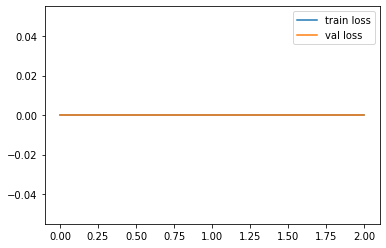

In [23]:
# plot Loss and Accuracies

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

